Epoch 0, Loss: 0.6513304114341736
Epoch 100, Loss: 0.0019347795750945807
Epoch 200, Loss: 0.001337568392045796
Epoch 300, Loss: 0.0011455314233899117
Epoch 400, Loss: 0.0008269761456176639
Epoch 500, Loss: 0.0006634336896240711
Epoch 600, Loss: 0.00047735575935803354
Epoch 700, Loss: 0.00035502828541211784
Epoch 800, Loss: 0.0038431952707469463
Epoch 900, Loss: 0.0001819166209315881


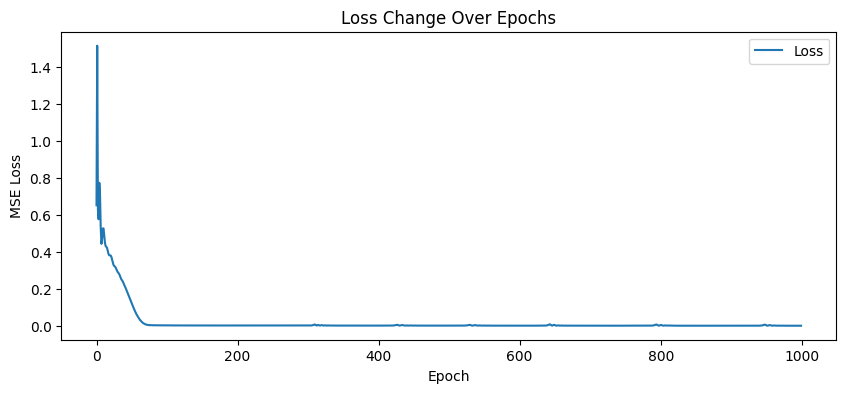

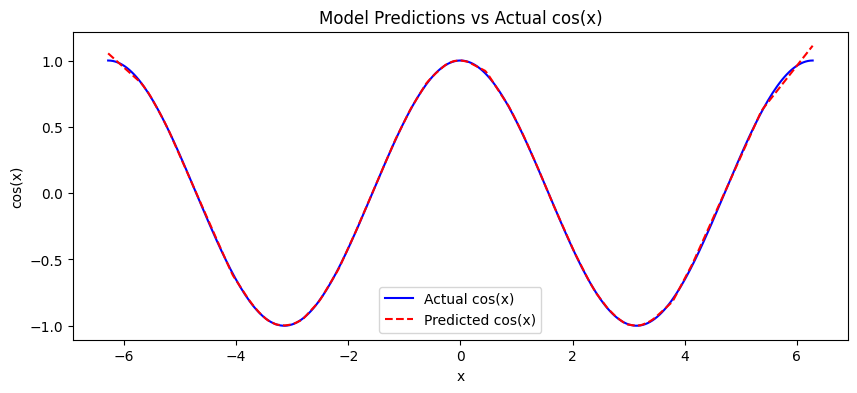

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate training data
x_train = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
y_train = np.cos(x_train)

# Convert to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).view(-1, 1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

# Define neural network model
class CosineNet(nn.Module):
    def __init__(self):
        super(CosineNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.layers(x)

# Initialize model, loss function, and optimizer
model = CosineNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 1000
loss_history = []
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Plot loss over epochs
plt.figure(figsize=(10, 4))
plt.plot(loss_history, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss Change Over Epochs')
plt.legend()
plt.show()

# Plot model predictions vs actual cos(x)
x_test = np.linspace(-2 * np.pi, 2 * np.pi, 300)
y_test = np.cos(x_test)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).view(-1, 1)
with torch.no_grad():
    y_pred = model(x_test_tensor).numpy()

plt.figure(figsize=(10, 4))
plt.plot(x_test, y_test, label='Actual cos(x)', color='blue')
plt.plot(x_test, y_pred, label='Predicted cos(x)', linestyle='dashed', color='red')
plt.xlabel('x')
plt.ylabel('cos(x)')
plt.title('Model Predictions vs Actual cos(x)')
plt.legend()
plt.show()
